<a href="https://colab.research.google.com/github/ArcticFoox/problem_solving_programming/blob/main/problem_solving_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
mf_train = files.upload()
mf_test = files.upload()

Saving train_data.csv to train_data.csv


Saving test_data.csv to test_data.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(mf_train['train_data.csv']))
test = pd.read_csv(io.BytesIO(mf_test['test_data.csv']))

In [ ]:
print(train.shape)
print(test.shape)

(8708, 12)
(2178, 12)


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-06-03 10:00:00,2,0,0,1,25.42,31.060,43,15.0013,127,277,404
1,2012-08-11 10:00:00,3,0,0,1,29.52,34.090,62,6.0032,125,282,407
2,2011-01-05 23:00:00,1,0,1,1,8.20,12.880,47,0.0000,1,18,19
3,2011-04-06 07:00:00,2,0,1,1,10.66,13.635,65,7.0015,3,130,133
4,2012-10-16 05:00:00,4,0,1,1,17.22,21.210,67,16.9979,5,47,52


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-11-18 19:00:00,4,0,0,1,14.76,17.425,66,11.0014,16,194,210
1,2011-01-13 11:00:00,1,0,1,2,8.20,8.335,44,30.0026,4,33,37
2,2012-08-19 02:00:00,3,0,0,2,25.42,30.305,69,6.0032,16,103,119
3,2011-09-13 05:00:00,3,0,1,1,22.96,26.515,88,0.0000,1,19,20
4,2012-06-18 03:00:00,2,0,1,2,21.32,25.000,83,15.0013,1,3,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   casual      8708 non-null   int64  
 10  registered  8708 non-null   int64  
 11  count       8708 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 816.5+ KB


In [ ]:
train['datetime'][0].split()[0].split('-')[0]

'2012'

In [ ]:
import time
start = time.time()
date = []
for i in range(len(train['datetime'])):
  date.append(train['datetime'][i].split()[0].split('-')[0])
print(f"for {time.time() - start}")

start = time.time()
date2 = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
print(len(date2))
print(f"apply {time.time() - start}")

for 0.05364871025085449
8708
apply 0.007292747497558594


In [ ]:
from datetime import datetime
import calendar

In [ ]:
datetime.strptime(train['datetime'][0],'%Y-%m-%d %H:%M:%S')

datetime.datetime(2012, 6, 3, 10, 0)

In [ ]:
date_year = train['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').year)
date_weekday = train['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday())

In [ ]:
date_weekday.head()

0    6
1    5
2    2
3    2
4    1
Name: datetime, dtype: int64

In [ ]:
calendar.day_name[date_weekday[0]]

'Sunday'

In [ ]:
train['year'] = train['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').year)
train['month'] = train['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').month)
train['day'] = train['datetime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').day)
train['week'] = train['datetime'].apply(lambda x: calendar.day_name[train['datetime']])

train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['min'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['sec'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

TypeError: ignored

In [ ]:
train['season'] = train['season'].map({1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'})

In [ ]:
train['weather'] = train['weather'].map({1:'Clear', 2: 'Mist', 3:'Light snow', 4:'Heavy snow'})

In [ ]:
train['season'].head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: object

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,week,hour,min,sec
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,00,00,00
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,01,00,00
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,02,00,00
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,03,00,00
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,04,00,00


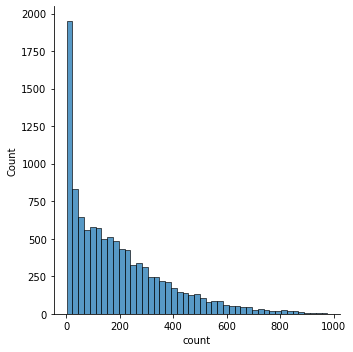

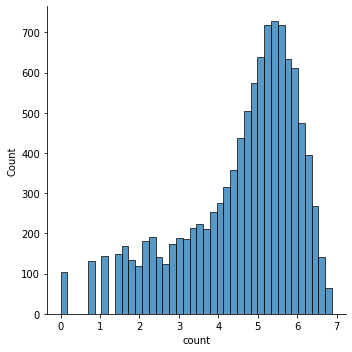

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.displot(train['count'])
sns.displot(np.log(train['count']))

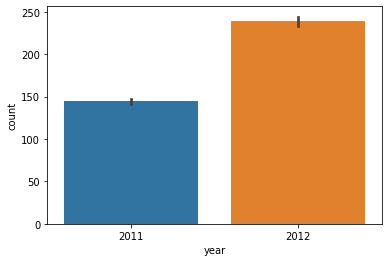

In [ ]:
sns.barplot(x = 'year', y = 'count', data = train)
# sns.barplot(x = 'season', y = 'count', data = train)

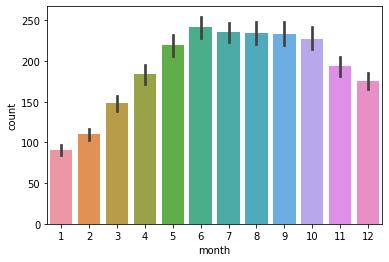

In [ ]:
sns.barplot(x = 'month', y = 'count', data = train)

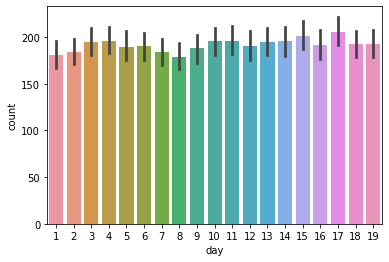

In [ ]:
sns.barplot(x = 'day', y = 'count', data = train)

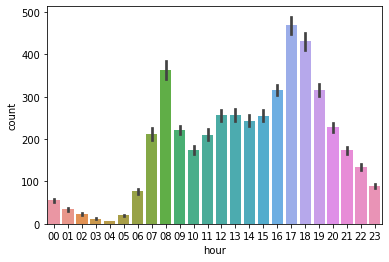

In [ ]:
sns.barplot(x = 'hour', y = 'count', data = train)

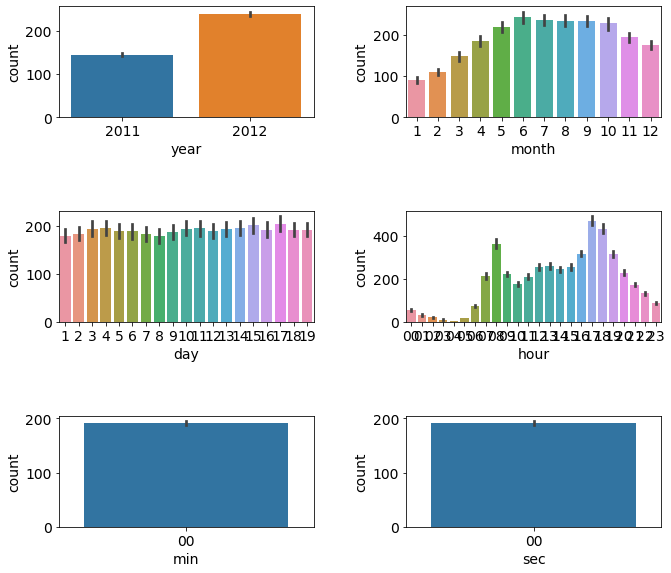

In [ ]:
mpl.rc('font', size = 14)
mpl.rc('axes', titlesize = 15)
figure,axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10, 9)

sns.barplot(x = 'year', y = 'count', data = train, ax = axes[0,0])
sns.barplot(x = 'month', y = 'count', data = train, ax = axes[0,1])
sns.barplot(x = 'day', y = 'count', data = train, ax = axes[1,0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = axes[1,1])
sns.barplot(x = 'min', y = 'count', data = train, ax = axes[2,0])
sns.barplot(x = 'sec', y = 'count', data = train, ax = axes[2,1])

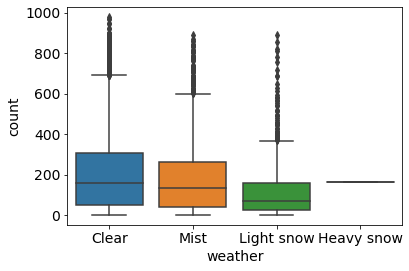

In [ ]:
ax = sns.boxplot(x = 'weather', y = 'count', data = train)

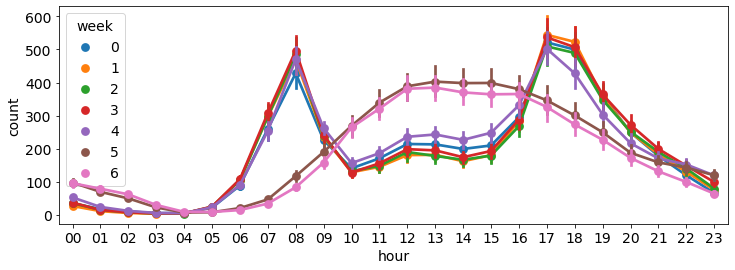

In [ ]:
plt.figure(figsize = (12,4))
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'week')

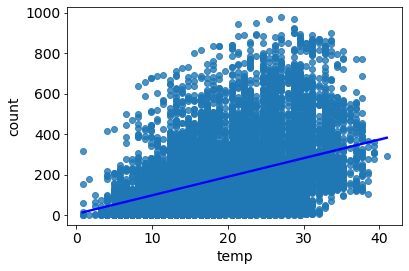

In [ ]:
sns.regplot(x = 'temp', y = 'count', data = train, line_kws = {'color' : 'blue'})

In [ ]:
train[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()

,count,temp,atemp,humidity,windspeed
count,1.000000,0.394454,0.389784,-0.317371,0.101369
temp,0.394454,1.000000,0.984948,-0.064949,-0.017852
atemp,0.389784,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.317371,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.101369,-0.017852,-0.057473,-0.318607,1.000000


[Text(0.5, 1.0, 'Heatmap of numerical data')]

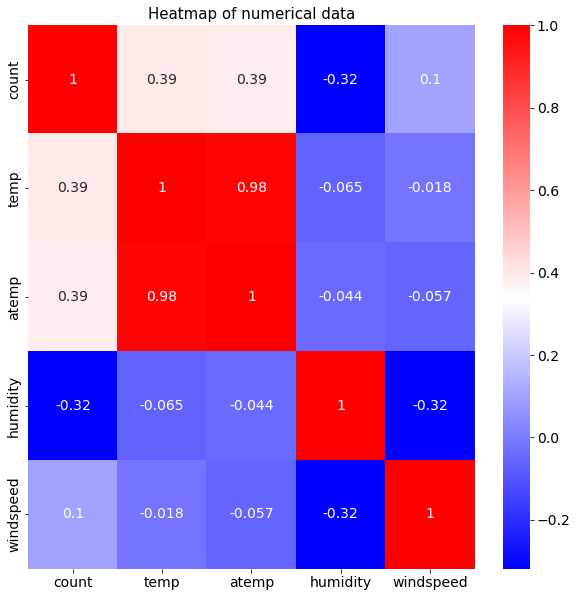

In [ ]:
corrMat = train[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, cmap = 'bwr', annot = True)
ax.set(title = 'Heatmap of numerical data')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime

In [ ]:
from google.colab import files
file1 = files.upload()
file2 = files.upload()

Saving train_data.csv to train_data (1).csv


Saving test_data.csv to test_data (1).csv


In [ ]:
import io
train= pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [ ]:
all_data = pd.concat([train, test], ignore_index = True)

In [ ]:
all_data['year'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)
all_data['month'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
all_data['hour'] = all_data['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
all_data['weekday'] = all_data['datetime'].apply(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d').weekday())

In [ ]:
all_data[all_data['weather'] == 4]
all_data = all_data[all_data['weather'] != 4]

In [ ]:
all_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'hour', 'weekday'],
      dtype='object')

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'windspeed']
all_data = all_data.drop(drop_features, axis = 1)

In [ ]:
del all_data['month']

In [ ]:
x_train = all_data[0:8707]
x_test = all_data[8707:]
y_train = x_train[['count']]
y_test = x_test[['count']]

In [ ]:
del x_train['count']
del x_test['count']

In [ ]:
def RMSLE(y_true, y_pred, convertExp):

  y_pred = y_pred.reshape(len(y_pred),1)
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
  log_true = np.log(y_true+1)
  log_pred = np.log(y_pred+1)

  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [ ]:
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

lin_model.fit(x_train, log_y_train)

LinearRegression()

In [ ]:
lin_model.coef_

array([[ 0.18075577,  0.02317785, -0.00587388, -0.00668758,  0.0131375 ,
         0.03163726, -0.0151898 ,  0.43768858,  0.10435207,  0.0265815 ]])

In [ ]:
lin_model.predict(x_train)

array([[5.18915978],
       [5.20445256],
       [4.95294017],
       ...,
       [5.96172823],
       [5.62753246],
       [3.55174114]])

In [ ]:
RMSLE(log_y_train, lin_model.predict(x_train), True)

count    1.021474
dtype: float64

In [ ]:
RMSLE(log_y_test, lin_model.predict(x_test), True)

count    1.017885
dtype: float64

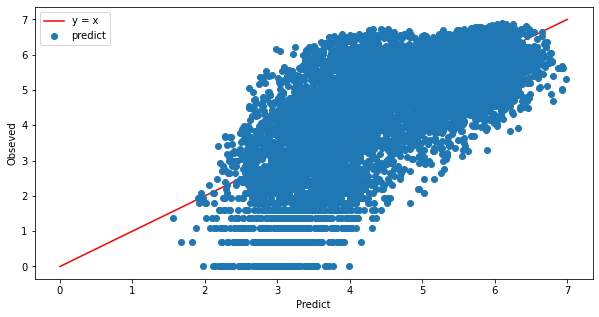

In [ ]:
plt.figure(figsize = (10,5))
x = np.linspace(0,7)
y = x
lines = plt.plot(x,y,'-r', lin_model.predict(x_train), log_y_train, 'o')
plt.xlabel('Predict')
plt.ylabel('Obseved')
plt.legend(('y = x', 'predict'),fontsize = 10, loc = 'best')

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
Ridge_model = Ridge(alpha=100)

In [ ]:
Ridge_model.fit(x_train, log_y_train)

Ridge(alpha=100)

In [ ]:
Ridge_model.coef_

array([[ 0.17896556,  0.01533954, -0.00811301, -0.00633813,  0.01335641,
         0.03156211, -0.01521964,  0.41828133,  0.10426916,  0.02597984]])

In [ ]:
Ridge_model.intercept_

array([-838.61603854])

In [ ]:
Ridge_pred_train = Ridge_model.predict(x_train)
Ridge_pred_test = Ridge_model.predict(x_test)

In [ ]:
Ridge_pred_train

array([[5.18154545],
       [5.19575244],
       [4.96309013],
       ...,
       [5.95142845],
       [5.6205695 ],
       [3.56290148]])

In [ ]:
RMSLE(log_y_train, Ridge_pred_train, True)

count    1.021475
dtype: float64

In [ ]:
RMSLE(log_y_test, Ridge_pred_test, True)

count    1.017927
dtype: float64

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
Lasso_model = Lasso(alpha=1)

In [ ]:
Lasso_model.fit(x_train, log_y_train)

Lasso(alpha=1)

In [ ]:
Lasso_model.coef_

array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.03940886, -0.01362931,  0.        ,  0.08512586,  0.        ])

In [ ]:
Lasso_pred_train = Lasso_model.predict(x_train)
Lasso_pred_test = Lasso_model.predict(x_test)

In [ ]:
RMSLE(log_y_train, Lasso_pred_train, True)#원래는 안되지만 RMSLE에서 reshape 해주는 과정을 추가해서 결과 도출 가능

count    1.06907
dtype: float64